# Standard Regression

### Import necessary libraries and dataset

In [1]:
#from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=500, n_features=10,
                       noise=1, random_state=42)

We first import the necessary libraries such as `Scikit-learn`, `Numpy` and `Matplotlib.` We also generated a synthetic dataset from the Scikit-learn dataset library, which is a regression dataset with 500 instances and 10 attributes. We then separate the independent variable X and dependent variable y from the dataset.


### Data Preprocessing - apply StandardScaler to standardize the data.

In [3]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Split the dataset into training and testing sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In this step, we split the dataset into training and testing sets. We keep `70%` of the dataset for training and `30%` for testing. We also set a random seed for reproducibility.

### Implement a Linear Regression Algorithm

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LinearR = LinearRegression()
LinearR.fit(X_train, y_train)
y_pred = LinearR.predict(X_test)

Here, we import the Perceptron algorithm from Scikit-learn's linear_model library. We then instantiate the perceptron object and fit it to our training data. We use the trained model to predict the target variable on the test data.

### Evaluate the performance of the regression problem

In [6]:
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))

Mean Squared Error:  0.9052902177417593


In this step, we calculate the mean squared error between the predicted values and actual values. This will give us an idea of how well our model is performing.

### Plot the residual

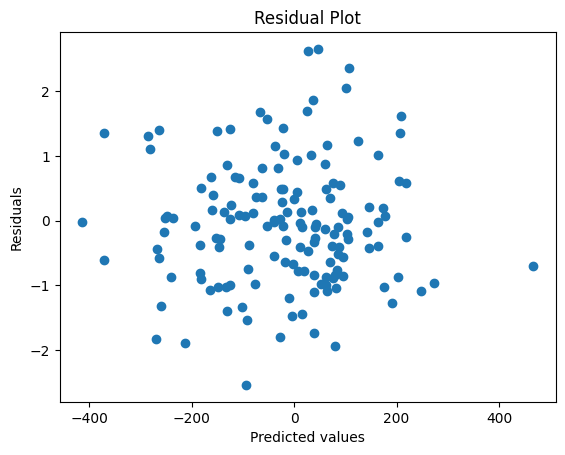

In [7]:
import matplotlib.pyplot as plt
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

Finally, we plot the residual between the predicted and actual values to visualize the errors in our model. A good model will have residuals randomly scattered around zero.

Overall, this code blocks above implement a linear regression algorithm for the generated dataset, evaluates its performance using mean squared error and plots the residual to visualize the errors. Other regression algorithms such as decision tree regression or random forest regression can also be used.

# Neural Network (Regression)

In [8]:
# import dependencies
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

### Data Preprocessing - apply StandardScaler to standardize the data.

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

### Split the dataset into training and testing sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=42)


In this step, we split the dataset into training and testing sets. We keep 70% of the dataset for training and 30% for testing. We also set a random seed for reproducibility.



### Implement a neural network model with 2 hidden layers using Keras (activation function: ReLU)

In [11]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), epochs=100,
                    batch_size=32, verbose=0)


Here, I define a sequential neural network model using Keras. I have also added 2 dense layers with 64 neurons each which use the rectified linear unit (ReLU) activation function. A final dense layer with a single neuron is also added for output. Then, the model is compiled using the Adam optimizer and mean squared error (MSE) loss function.

The parameters for fitting the training data include:
- 100 epochs 
- batch size of 32 (for each epoch, we feed the data into the model by iterating through the data (X_train.shape[0] / 32) times

We also evaluate the model on the testing data using the validation_data parameter.



### Evaluate the performance of the regression problem

In [12]:
mse_train = model.evaluate(X_train, y_train, verbose=0)
mse_test = model.evaluate(X_test, y_test, verbose=0)
print("Training Mean Squared Error: ", mse_train)
print("Testing Mean Squared Error: ", mse_test)

Training Mean Squared Error:  44.803104400634766
Testing Mean Squared Error:  75.55601501464844


In this step, we calculate the mean squared error between the predicted values and actual values for both training and testing sets. This gives us an idea of how well our model is performing.

As seen from the results, the model does not perform too well as the testing mean squared error is way over 50%. This shows that the model does not perform too well when predicting unseen data.

# Exercises

1. Try different number of hidden layers, number of neurons and changing the activation function
2. Plot the residual, training and testing.
3. Report your findings

### 1) Implement a neural network model with 3 hidden layers using Keras (activation function:ReLU)

In [13]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), epochs=100,
                    batch_size=32, verbose=0)

Here, I define a sequential neural network model with 3 hidden layers as opposed to the previous model.
The hidden layers consist of 128, 64 and 32 neurons respectively with each using the rectified linear unit (ReLU) activation function. There is also a final dense layer with a single neuron for output. The model is compiled using the Adam optimizer and mean squared error (MSE) loss function.

The parameters for fitting the training data include:
- 100 epochs 
- batch size of 32 (for each epoch, we feed the data into the model by iterating through the data (X_train.shape[0] / 32) times

We also evaluate the model on the testing data using the validation_data parameter.


#### Evaluate the performance of the regression problem

In [14]:
mse_train = model.evaluate(X_train, y_train, verbose=0)
mse_test = model.evaluate(X_test, y_test, verbose=0)
print("Training Mean Squared Error: ", mse_train)
print("Testing Mean Squared Error: ", mse_test)

Training Mean Squared Error:  13.234246253967285
Testing Mean Squared Error:  42.14602279663086


After adding an additional layer, and reducing the number of neurons in the second hidden layer from 64 to 32, the model's performance increased. This can be seen in the reduction of the mean squared error from *75.556* to *42.146*. This shows that by increasing the number of layers and gradually reducing the size of the hidden layers, the model performed better. 

The next implementation uses less hidden layers, but employs a more powerful activation function than the regular ReLU function: LeakyReLU.

### 2) Implement a neural network model with 2 hidden layers using Keras (activation function: Leaky ReLU)

In [17]:
# import the LeakyReLU module and create a LeakyReLU instance
from keras.layers import LeakyReLU
leaky_relu = LeakyReLU(alpha=0.01)

In [18]:
model = Sequential()
model.add(Dense(64, activation='leaky_relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='leaky_relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), epochs=100,
                    batch_size=32, verbose=0)


Here, I define a sequential neural network model with 2 hidden layers as opposed to the previous model.
The hidden layers consist of 64 neurons each and each of the layers uses the Leaky rectified linear unit (Leaky ReLU) activation function. There is also a final dense layer with a single neuron for output. The model is compiled using the Adam optimizer and mean squared error (MSE) loss function.

The parameters for fitting the training data include:
- 100 epochs 
- batch size of 32 (for each epoch, we feed the data into the model by iterating through the data (X_train.shape[0] / 32) times

We also evaluate the model on the testing data using the validation_data parameter.


#### Evaluate the performance of the regression problem

In [19]:
mse_train = model.evaluate(X_train, y_train, verbose=0)
mse_test = model.evaluate(X_test, y_test, verbose=0)
print("Training Mean Squared Error: ", mse_train)
print("Testing Mean Squared Error: ", mse_test)

Training Mean Squared Error:  22.729644775390625
Testing Mean Squared Error:  42.680843353271484


After reducing the number of hidden layers and changing the activation function to the LeakyReLU function, the model's performance reduced slightly. This is rather surprising since we would expect the LeakyReLU function to perform better than the regular ReLU function used in the previous model. 
However, if we observe that the number of hidden layers was reduced, we can understand the reason for the reduction in the model's performance.

The next implementation uses the same activation function (LeakyReLU) but adds an additional hidden layer. We shall observe if the LeakyReLU's performance increases with an increase in the number of hidden layers.

### 3) Implement a neural network model with 3 hidden layers using Keras (activation function: Leaky ReLU)

In [20]:
leaky_relu = LeakyReLU(alpha=0.02)

In [21]:
model = Sequential()
model.add(Dense(128, activation='leaky_relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='leaky_relu'))
model.add(Dense(32, activation='leaky_relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), epochs=100,
                    batch_size=32, verbose=0)



Here, I define a sequential neural network model with 3 hidden layers as opposed to the previous model.
The hidden layers consist of 128, 64 and 32 neurons respectively with each using the Leaky rectified linear unit (Leaky ReLU) activation function. There is also a final dense layer with a single neuron for output. The model is compiled using the Adam optimizer and mean squared error (MSE) loss function.

The parameters for fitting the training data include:
- 100 epochs 
- batch size of 32 (for each epoch, we feed the data into the model by iterating through the data (X_train.shape[0] / 32) times

We also evaluate the model on the testing data using the validation_data parameter.


#### Evaluate the performance of the regression problem

In [22]:
mse_train = model.evaluate(X_train, y_train, verbose=0)
mse_test = model.evaluate(X_test, y_test, verbose=0)
print("Training Mean Squared Error: ", mse_train)
print("Testing Mean Squared Error: ", mse_test)

Training Mean Squared Error:  3.4922749996185303
Testing Mean Squared Error:  11.26406478881836


The results above confirm the fact that the more hidden layers, the better the performance of the model.
We can see that the testing MSE shows a drastic reduction from 42.68 to 11.264, after the addition of just one hidden layer consisting of 32 neurons.

*Note: Leaky ReLU is an improvement over the ReLU activation function. It has all properties of ReLU, plus it will never have dying ReLU problem(a situation which occurs during training when some neurons effectively die, and stop outputting anything other than 0)*

Follow this link for more information on Leaky ReLU: <a href="https://towardsdatascience.com/7-popular-activation-functions-you-should-know-in-deep-learning-and-how-to-use-them-with-keras-and-27b4d838dfe6">(7 popular activation functions you should know in Deep Learning and how to use them with Keras and TensorFlow 2)</a>

# Classification Problems

### Import necessary libraries and dataset

In [42]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [43]:
iris = load_iris()
X = iris.data
y = iris.target

In this step, we first import the necessary libraries such as Scikit-learn, Keras, Numpy and Matplotlib. We also load the Iris dataset from the Scikit-learn dataset library, which is a classification dataset with 150 instances and 4 attributes. We then separate the independent variable X and dependent variable y from the dataset.

### Data Preprocessing - apply StandardScaler to standardize the data and convert the target variable to categorical format.

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = to_categorical(y)

### Split the dataset into training and testing sets

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In this step, we split the dataset into training and testing sets. We keep 70% of the dataset for training and 30% for testing. We also set a random seed for reproducibility.


### Implement a neural network model with 3 hidden layers using Keras

In [92]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=1000, batch_size=32)


Epoch 1/1000
4/4 [==============================] - 2s 143ms/step - loss: 1.0791 - accuracy: 0.3048 - val_loss: 1.0436 - val_accuracy: 0.3333
Epoch 2/1000
4/4 [==============================] - 0s 28ms/step - loss: 0.9954 - accuracy: 0.5143 - val_loss: 0.9642 - val_accuracy: 0.6889
Epoch 3/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.9222 - accuracy: 0.8000 - val_loss: 0.8908 - val_accuracy: 0.8000
Epoch 4/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.8573 - accuracy: 0.8000 - val_loss: 0.8269 - val_accuracy: 0.8222
Epoch 5/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.7966 - accuracy: 0.8000 - val_loss: 0.7671 - val_accuracy: 0.8000
Epoch 6/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.7405 - accuracy: 0.8190 - val_loss: 0.7122 - val_accuracy: 0.8000
Epoch 7/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.6897 - accuracy: 0.8190 - val_loss: 0.6626 - val_accuracy: 0.8000
Epoch 8/1000

Epoch 59/1000
4/4 [==============================] - 0s 29ms/step - loss: 0.0808 - accuracy: 0.9714 - val_loss: 0.0417 - val_accuracy: 1.0000
Epoch 60/1000
4/4 [==============================] - 0s 32ms/step - loss: 0.0824 - accuracy: 0.9619 - val_loss: 0.0390 - val_accuracy: 1.0000
Epoch 61/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.0789 - accuracy: 0.9714 - val_loss: 0.0427 - val_accuracy: 1.0000
Epoch 62/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.0785 - accuracy: 0.9619 - val_loss: 0.0479 - val_accuracy: 0.9778
Epoch 63/1000
4/4 [==============================] - 0s 27ms/step - loss: 0.0798 - accuracy: 0.9619 - val_loss: 0.0461 - val_accuracy: 0.9778
Epoch 64/1000
4/4 [==============================] - 0s 31ms/step - loss: 0.0777 - accuracy: 0.9619 - val_loss: 0.0405 - val_accuracy: 1.0000
Epoch 65/1000
4/4 [==============================] - 0s 27ms/step - loss: 0.0735 - accuracy: 0.9714 - val_loss: 0.0370 - val_accuracy: 1.0000
Epoch 

4/4 [==============================] - 0s 31ms/step - loss: 0.0412 - accuracy: 0.9810 - val_loss: 0.0140 - val_accuracy: 1.0000
Epoch 117/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.0407 - accuracy: 0.9905 - val_loss: 0.0139 - val_accuracy: 1.0000
Epoch 118/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.0409 - accuracy: 0.9905 - val_loss: 0.0138 - val_accuracy: 1.0000
Epoch 119/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.0399 - accuracy: 0.9905 - val_loss: 0.0117 - val_accuracy: 1.0000
Epoch 120/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.0403 - accuracy: 0.9810 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 121/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.0412 - accuracy: 0.9810 - val_loss: 0.0135 - val_accuracy: 1.0000
Epoch 122/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.0402 - accuracy: 0.9905 - val_loss: 0.0136 - val_accuracy: 1.0000
Epoch 123/1000

4/4 [==============================] - 0s 25ms/step - loss: 0.0272 - accuracy: 0.9905 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 174/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.0274 - accuracy: 0.9905 - val_loss: 0.0082 - val_accuracy: 1.0000
Epoch 175/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.0267 - accuracy: 0.9905 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 176/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.0274 - accuracy: 0.9905 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 177/1000
4/4 [==============================] - 0s 27ms/step - loss: 0.0253 - accuracy: 0.9905 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 178/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.0268 - accuracy: 0.9905 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 179/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.0267 - accuracy: 0.9905 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 180/1000

4/4 [==============================] - 0s 26ms/step - loss: 0.0173 - accuracy: 0.9905 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 231/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.0169 - accuracy: 0.9905 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 232/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.0169 - accuracy: 0.9905 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 233/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.0164 - accuracy: 1.0000 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 234/1000
4/4 [==============================] - 0s 27ms/step - loss: 0.0164 - accuracy: 0.9905 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 235/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.0167 - accuracy: 0.9905 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 236/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.0161 - accuracy: 0.9905 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 237/1000

4/4 [==============================] - 0s 24ms/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 288/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.0103 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 289/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 290/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 291/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 292/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 293/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 294/1000

4/4 [==============================] - 0s 27ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 345/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 346/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 347/1000
4/4 [==============================] - 0s 27ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 348/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 349/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 350/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 351/1000

4/4 [==============================] - 0s 24ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 402/1000
4/4 [==============================] - 0s 27ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 403/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 404/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 405/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 406/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 407/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 408/1000

4/4 [==============================] - 0s 27ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 459/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 460/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 461/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 462/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 463/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 464/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 465/1000

Epoch 515/1000
4/4 [==============================] - 0s 29ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 9.6252e-04 - val_accuracy: 1.0000
Epoch 516/1000
4/4 [==============================] - 0s 28ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 8.7044e-04 - val_accuracy: 1.0000
Epoch 517/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 7.4131e-04 - val_accuracy: 1.0000
Epoch 518/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 7.4666e-04 - val_accuracy: 1.0000
Epoch 519/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 7.8299e-04 - val_accuracy: 1.0000
Epoch 520/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 8.3689e-04 - val_accuracy: 1.0000
Epoch 521/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 9.218

Epoch 570/1000
4/4 [==============================] - 0s 27ms/step - loss: 8.4762e-04 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 571/1000
4/4 [==============================] - 0s 25ms/step - loss: 8.6794e-04 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 572/1000
4/4 [==============================] - 0s 23ms/step - loss: 8.5881e-04 - accuracy: 1.0000 - val_loss: 9.8958e-04 - val_accuracy: 1.0000
Epoch 573/1000
4/4 [==============================] - 0s 21ms/step - loss: 8.2143e-04 - accuracy: 1.0000 - val_loss: 9.0370e-04 - val_accuracy: 1.0000
Epoch 574/1000
4/4 [==============================] - 0s 23ms/step - loss: 8.1789e-04 - accuracy: 1.0000 - val_loss: 7.4921e-04 - val_accuracy: 1.0000
Epoch 575/1000
4/4 [==============================] - 0s 24ms/step - loss: 7.9563e-04 - accuracy: 1.0000 - val_loss: 7.0210e-04 - val_accuracy: 1.0000
Epoch 576/1000
4/4 [==============================] - 0s 24ms/step - loss: 7.8843e-04 - accuracy: 1.00

4/4 [==============================] - 0s 26ms/step - loss: 6.0821e-04 - accuracy: 1.0000 - val_loss: 7.1276e-04 - val_accuracy: 1.0000
Epoch 625/1000
4/4 [==============================] - 0s 23ms/step - loss: 5.8444e-04 - accuracy: 1.0000 - val_loss: 6.8190e-04 - val_accuracy: 1.0000
Epoch 626/1000
4/4 [==============================] - 0s 23ms/step - loss: 5.9121e-04 - accuracy: 1.0000 - val_loss: 6.4756e-04 - val_accuracy: 1.0000
Epoch 627/1000
4/4 [==============================] - 0s 23ms/step - loss: 5.8162e-04 - accuracy: 1.0000 - val_loss: 5.5994e-04 - val_accuracy: 1.0000
Epoch 628/1000
4/4 [==============================] - 0s 24ms/step - loss: 6.1714e-04 - accuracy: 1.0000 - val_loss: 5.4118e-04 - val_accuracy: 1.0000
Epoch 629/1000
4/4 [==============================] - 0s 25ms/step - loss: 5.8986e-04 - accuracy: 1.0000 - val_loss: 6.1341e-04 - val_accuracy: 1.0000
Epoch 630/1000
4/4 [==============================] - 0s 22ms/step - loss: 5.7239e-04 - accuracy: 1.0000 - va

4/4 [==============================] - 0s 23ms/step - loss: 4.4309e-04 - accuracy: 1.0000 - val_loss: 6.3065e-04 - val_accuracy: 1.0000
Epoch 679/1000
4/4 [==============================] - 0s 23ms/step - loss: 4.4412e-04 - accuracy: 1.0000 - val_loss: 6.9125e-04 - val_accuracy: 1.0000
Epoch 680/1000
4/4 [==============================] - 0s 25ms/step - loss: 4.5733e-04 - accuracy: 1.0000 - val_loss: 7.3413e-04 - val_accuracy: 1.0000
Epoch 681/1000
4/4 [==============================] - 0s 21ms/step - loss: 4.5504e-04 - accuracy: 1.0000 - val_loss: 6.7024e-04 - val_accuracy: 1.0000
Epoch 682/1000
4/4 [==============================] - 0s 25ms/step - loss: 4.4200e-04 - accuracy: 1.0000 - val_loss: 6.1192e-04 - val_accuracy: 1.0000
Epoch 683/1000
4/4 [==============================] - 0s 23ms/step - loss: 4.3661e-04 - accuracy: 1.0000 - val_loss: 5.7582e-04 - val_accuracy: 1.0000
Epoch 684/1000
4/4 [==============================] - 0s 21ms/step - loss: 4.3864e-04 - accuracy: 1.0000 - va

4/4 [==============================] - 0s 22ms/step - loss: 3.4606e-04 - accuracy: 1.0000 - val_loss: 5.1200e-04 - val_accuracy: 1.0000
Epoch 733/1000
4/4 [==============================] - 0s 26ms/step - loss: 3.6345e-04 - accuracy: 1.0000 - val_loss: 4.3502e-04 - val_accuracy: 1.0000
Epoch 734/1000
4/4 [==============================] - 0s 27ms/step - loss: 3.4610e-04 - accuracy: 1.0000 - val_loss: 4.8133e-04 - val_accuracy: 1.0000
Epoch 735/1000
4/4 [==============================] - 0s 74ms/step - loss: 3.3851e-04 - accuracy: 1.0000 - val_loss: 5.3163e-04 - val_accuracy: 1.0000
Epoch 736/1000
4/4 [==============================] - 0s 30ms/step - loss: 3.3908e-04 - accuracy: 1.0000 - val_loss: 5.8336e-04 - val_accuracy: 1.0000
Epoch 737/1000
4/4 [==============================] - 0s 47ms/step - loss: 3.3887e-04 - accuracy: 1.0000 - val_loss: 6.3372e-04 - val_accuracy: 1.0000
Epoch 738/1000
4/4 [==============================] - 0s 17ms/step - loss: 3.4060e-04 - accuracy: 1.0000 - va

4/4 [==============================] - 0s 22ms/step - loss: 2.7106e-04 - accuracy: 1.0000 - val_loss: 4.2486e-04 - val_accuracy: 1.0000
Epoch 787/1000
4/4 [==============================] - 0s 25ms/step - loss: 2.6442e-04 - accuracy: 1.0000 - val_loss: 4.4048e-04 - val_accuracy: 1.0000
Epoch 788/1000
4/4 [==============================] - 0s 24ms/step - loss: 2.6362e-04 - accuracy: 1.0000 - val_loss: 4.6529e-04 - val_accuracy: 1.0000
Epoch 789/1000
4/4 [==============================] - 0s 26ms/step - loss: 2.6544e-04 - accuracy: 1.0000 - val_loss: 4.7713e-04 - val_accuracy: 1.0000
Epoch 790/1000
4/4 [==============================] - 0s 23ms/step - loss: 2.7021e-04 - accuracy: 1.0000 - val_loss: 4.9615e-04 - val_accuracy: 1.0000
Epoch 791/1000
4/4 [==============================] - 0s 33ms/step - loss: 2.6037e-04 - accuracy: 1.0000 - val_loss: 4.1227e-04 - val_accuracy: 1.0000
Epoch 792/1000
4/4 [==============================] - 0s 20ms/step - loss: 2.6225e-04 - accuracy: 1.0000 - va

4/4 [==============================] - 0s 22ms/step - loss: 2.1129e-04 - accuracy: 1.0000 - val_loss: 3.7866e-04 - val_accuracy: 1.0000
Epoch 841/1000
4/4 [==============================] - 0s 23ms/step - loss: 2.1001e-04 - accuracy: 1.0000 - val_loss: 3.6897e-04 - val_accuracy: 1.0000
Epoch 842/1000
4/4 [==============================] - 0s 24ms/step - loss: 2.0988e-04 - accuracy: 1.0000 - val_loss: 3.4589e-04 - val_accuracy: 1.0000
Epoch 843/1000
4/4 [==============================] - 0s 29ms/step - loss: 2.0835e-04 - accuracy: 1.0000 - val_loss: 3.4489e-04 - val_accuracy: 1.0000
Epoch 844/1000
4/4 [==============================] - 0s 25ms/step - loss: 2.0721e-04 - accuracy: 1.0000 - val_loss: 3.4415e-04 - val_accuracy: 1.0000
Epoch 845/1000
4/4 [==============================] - 0s 24ms/step - loss: 2.0592e-04 - accuracy: 1.0000 - val_loss: 3.5693e-04 - val_accuracy: 1.0000
Epoch 846/1000
4/4 [==============================] - 0s 27ms/step - loss: 2.0781e-04 - accuracy: 1.0000 - va

4/4 [==============================] - 0s 21ms/step - loss: 1.7406e-04 - accuracy: 1.0000 - val_loss: 3.3403e-04 - val_accuracy: 1.0000
Epoch 895/1000
4/4 [==============================] - 0s 22ms/step - loss: 1.7419e-04 - accuracy: 1.0000 - val_loss: 3.2096e-04 - val_accuracy: 1.0000
Epoch 896/1000
4/4 [==============================] - 0s 25ms/step - loss: 1.7146e-04 - accuracy: 1.0000 - val_loss: 3.2490e-04 - val_accuracy: 1.0000
Epoch 897/1000
4/4 [==============================] - 0s 22ms/step - loss: 1.7117e-04 - accuracy: 1.0000 - val_loss: 3.1506e-04 - val_accuracy: 1.0000
Epoch 898/1000
4/4 [==============================] - 0s 25ms/step - loss: 1.6866e-04 - accuracy: 1.0000 - val_loss: 3.0592e-04 - val_accuracy: 1.0000
Epoch 899/1000
4/4 [==============================] - 0s 21ms/step - loss: 1.7134e-04 - accuracy: 1.0000 - val_loss: 3.0416e-04 - val_accuracy: 1.0000
Epoch 900/1000
4/4 [==============================] - 0s 21ms/step - loss: 1.7118e-04 - accuracy: 1.0000 - va

4/4 [==============================] - 0s 25ms/step - loss: 1.3806e-04 - accuracy: 1.0000 - val_loss: 2.6754e-04 - val_accuracy: 1.0000
Epoch 949/1000
4/4 [==============================] - 0s 23ms/step - loss: 1.3737e-04 - accuracy: 1.0000 - val_loss: 2.5960e-04 - val_accuracy: 1.0000
Epoch 950/1000
4/4 [==============================] - 0s 26ms/step - loss: 1.3708e-04 - accuracy: 1.0000 - val_loss: 2.5860e-04 - val_accuracy: 1.0000
Epoch 951/1000
4/4 [==============================] - 0s 25ms/step - loss: 1.3641e-04 - accuracy: 1.0000 - val_loss: 2.6037e-04 - val_accuracy: 1.0000
Epoch 952/1000
4/4 [==============================] - 0s 28ms/step - loss: 1.3763e-04 - accuracy: 1.0000 - val_loss: 2.6667e-04 - val_accuracy: 1.0000
Epoch 953/1000
4/4 [==============================] - 0s 24ms/step - loss: 1.3635e-04 - accuracy: 1.0000 - val_loss: 2.6354e-04 - val_accuracy: 1.0000
Epoch 954/1000
4/4 [==============================] - 0s 24ms/step - loss: 1.3566e-04 - accuracy: 1.0000 - va

Here, we define a sequential neural network model using Keras. We add 3 dense layers with 64, 32, and 16 neurons each, respectively, and use the rectified linear unit (ReLU) activation function. We also add a final dense layer with 3 neurons for output using the softmax activation function(this activation function is used for multiclass problems). 
The model is also compiled using the Adam optimizer and categorical cross-entropy loss function.

We then fit the model on the training data for 100 epochs with a batch size of 32. We also evaluate the model on the testing data using the validation_data parameter and accuracy as a metric.

### Compute and plot the confusion matrix

2/2 [==============================] - 0s 5ms/step


Text(50.722222222222214, 0.5, 'True labels')

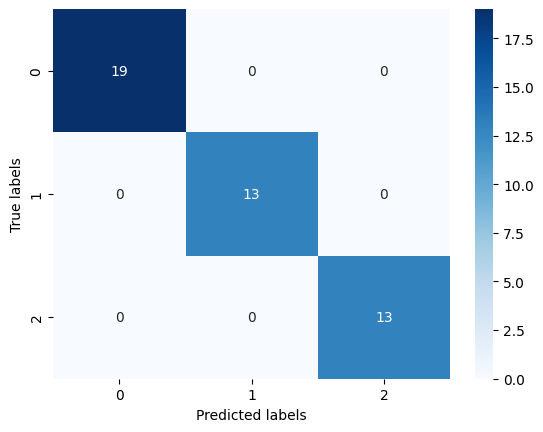

In [94]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

Here, we predict the classes for the testing data and calculate the confusion matrix to evaluate the performance of our model. We then use the seaborn library to plot the confusion matrix.



### Plot the residual, training and testing error

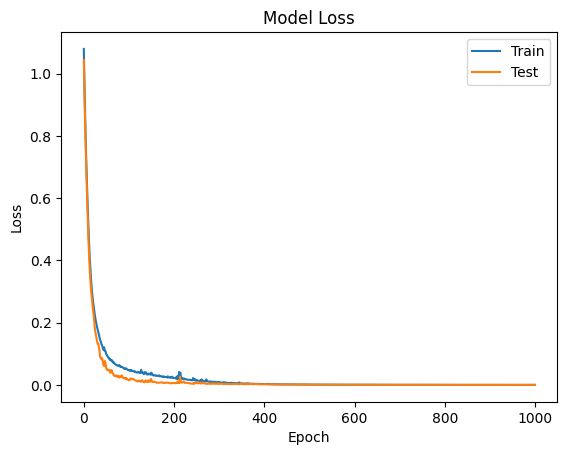

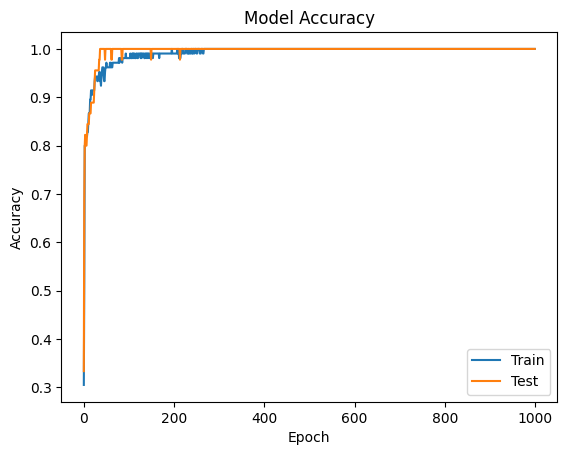

In [95]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

In this step, we plot the model loss and accuracy for both training and testing data. This helps us to understand how well our model is performing on both datasets and whether the model is overfitting or not. We can adjust the number of epochs or the model architecture to improve the performance.

Overall, this code provides a good starting point for a classification problem using Scikit-learn and Keras. It includes all the necessary steps, such as preprocessing, model definition, training, evaluation, and visualization. However, you may need to adjust some parameters based on your specific problem or dataset.

In [96]:
# Evaluate the model on the training and testing data
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print("Training Loss: ", train_loss)
print("Training Accuracy: ", train_accuracy)
print("Testing Loss: ", test_loss)
print("Testing Accuracy: ", test_accuracy)

Training Loss:  0.00011646049824776128
Training Accuracy:  1.0
Testing Loss:  0.0003096733125858009
Testing Accuracy:  1.0


## Exercises

1. Try different number of hidden layers, number of neurons and changing the activation function
2. Plot the residual, training and testing error.
3. Report your findings

### 1) Implement a neural network model with 3 hidden layers using activation function: relu

In [51]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=1000, batch_size=32)


Epoch 1/1000
4/4 [==============================] - 1s 67ms/step - loss: 1.0494 - accuracy: 0.5429 - val_loss: 0.9352 - val_accuracy: 0.7333
Epoch 2/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.9069 - accuracy: 0.7905 - val_loss: 0.8139 - val_accuracy: 0.8000
Epoch 3/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.8024 - accuracy: 0.8286 - val_loss: 0.7160 - val_accuracy: 0.8444
Epoch 4/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.7139 - accuracy: 0.8190 - val_loss: 0.6225 - val_accuracy: 0.8444
Epoch 5/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.6286 - accuracy: 0.8286 - val_loss: 0.5375 - val_accuracy: 0.8444
Epoch 6/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.5507 - accuracy: 0.8286 - val_loss: 0.4672 - val_accuracy: 0.8444
Epoch 7/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.4849 - accuracy: 0.8381 - val_loss: 0.4143 - val_accuracy: 0.8444
Epoch 8/1000


Epoch 59/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0599 - accuracy: 0.9810 - val_loss: 0.0187 - val_accuracy: 1.0000
Epoch 60/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0513 - accuracy: 0.9810 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 61/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0488 - accuracy: 0.9810 - val_loss: 0.0151 - val_accuracy: 1.0000
Epoch 62/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0487 - accuracy: 0.9810 - val_loss: 0.0130 - val_accuracy: 1.0000
Epoch 63/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0469 - accuracy: 0.9905 - val_loss: 0.0121 - val_accuracy: 1.0000
Epoch 64/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0469 - accuracy: 0.9810 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 65/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0468 - accuracy: 0.9810 - val_loss: 0.0106 - val_accuracy: 1.0000
Epoch 

4/4 [==============================] - 0s 13ms/step - loss: 0.0276 - accuracy: 0.9905 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 117/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0285 - accuracy: 0.9905 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 118/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0266 - accuracy: 0.9905 - val_loss: 0.0080 - val_accuracy: 1.0000
Epoch 119/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0296 - accuracy: 0.9810 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 120/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0261 - accuracy: 0.9905 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 121/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0263 - accuracy: 0.9905 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 122/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0263 - accuracy: 0.9905 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 123/1000

4/4 [==============================] - 0s 13ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 174/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 175/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 176/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 177/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 178/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 179/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 180/1000

4/4 [==============================] - 0s 14ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 231/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 232/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 233/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 234/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 235/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 236/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 237/1000

4/4 [==============================] - 0s 13ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 288/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 289/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 290/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 291/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 292/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 293/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 294/1000

4/4 [==============================] - 0s 11ms/step - loss: 7.0770e-04 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 344/1000
4/4 [==============================] - 0s 11ms/step - loss: 7.0962e-04 - accuracy: 1.0000 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 345/1000
4/4 [==============================] - 0s 11ms/step - loss: 6.7506e-04 - accuracy: 1.0000 - val_loss: 0.0083 - val_accuracy: 1.0000
Epoch 346/1000
4/4 [==============================] - 0s 11ms/step - loss: 6.6877e-04 - accuracy: 1.0000 - val_loss: 0.0088 - val_accuracy: 1.0000
Epoch 347/1000
4/4 [==============================] - 0s 12ms/step - loss: 6.5924e-04 - accuracy: 1.0000 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 348/1000
4/4 [==============================] - 0s 16ms/step - loss: 6.4146e-04 - accuracy: 1.0000 - val_loss: 0.0100 - val_accuracy: 1.0000
Epoch 349/1000
4/4 [==============================] - 0s 13ms/step - loss: 6.8408e-04 - accuracy: 1.0000 - val_loss: 0.0100 - val_acc

Epoch 399/1000
4/4 [==============================] - 0s 13ms/step - loss: 4.2294e-04 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 400/1000
4/4 [==============================] - 0s 13ms/step - loss: 4.2141e-04 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 401/1000
4/4 [==============================] - 0s 14ms/step - loss: 4.1189e-04 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 402/1000
4/4 [==============================] - 0s 13ms/step - loss: 4.0690e-04 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 403/1000
4/4 [==============================] - 0s 13ms/step - loss: 4.0433e-04 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 404/1000
4/4 [==============================] - 0s 14ms/step - loss: 4.0631e-04 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 405/1000
4/4 [==============================] - 0s 14ms/step - loss: 4.1557e-04 - accuracy: 1.0000 - val_loss: 0

Epoch 455/1000
4/4 [==============================] - 0s 22ms/step - loss: 2.7078e-04 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 456/1000
4/4 [==============================] - 0s 12ms/step - loss: 2.7606e-04 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 457/1000
4/4 [==============================] - 0s 13ms/step - loss: 2.8241e-04 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 458/1000
4/4 [==============================] - 0s 11ms/step - loss: 2.7772e-04 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 459/1000
4/4 [==============================] - 0s 13ms/step - loss: 2.6824e-04 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 460/1000
4/4 [==============================] - 0s 12ms/step - loss: 2.7254e-04 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 461/1000
4/4 [==============================] - 0s 13ms/step - loss: 2.6768e-04 - accuracy: 1.0000 - val_loss: 0

Epoch 511/1000
4/4 [==============================] - 0s 13ms/step - loss: 1.9193e-04 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 512/1000
4/4 [==============================] - 0s 12ms/step - loss: 1.8970e-04 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 513/1000
4/4 [==============================] - 0s 14ms/step - loss: 1.9167e-04 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 514/1000
4/4 [==============================] - 0s 12ms/step - loss: 1.9470e-04 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 515/1000
4/4 [==============================] - 0s 14ms/step - loss: 1.9287e-04 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 516/1000
4/4 [==============================] - 0s 13ms/step - loss: 1.8953e-04 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 517/1000
4/4 [==============================] - 0s 17ms/step - loss: 1.8698e-04 - accuracy: 1.0000 - val_loss: 0

4/4 [==============================] - 0s 13ms/step - loss: 1.4285e-04 - accuracy: 1.0000 - val_loss: 9.8969e-04 - val_accuracy: 1.0000
Epoch 567/1000
4/4 [==============================] - 0s 12ms/step - loss: 1.4176e-04 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 568/1000
4/4 [==============================] - 0s 13ms/step - loss: 1.4226e-04 - accuracy: 1.0000 - val_loss: 9.0483e-04 - val_accuracy: 1.0000
Epoch 569/1000
4/4 [==============================] - 0s 12ms/step - loss: 1.4124e-04 - accuracy: 1.0000 - val_loss: 9.3287e-04 - val_accuracy: 1.0000
Epoch 570/1000
4/4 [==============================] - 0s 13ms/step - loss: 1.4013e-04 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 571/1000
4/4 [==============================] - 0s 13ms/step - loss: 1.3966e-04 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 572/1000
4/4 [==============================] - 0s 13ms/step - loss: 1.3818e-04 - accuracy: 1.0000 - val_loss: 0.00

4/4 [==============================] - 0s 13ms/step - loss: 1.1099e-04 - accuracy: 1.0000 - val_loss: 8.0645e-04 - val_accuracy: 1.0000
Epoch 621/1000
4/4 [==============================] - 0s 12ms/step - loss: 1.0824e-04 - accuracy: 1.0000 - val_loss: 9.4286e-04 - val_accuracy: 1.0000
Epoch 622/1000
4/4 [==============================] - 0s 13ms/step - loss: 1.0810e-04 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 623/1000
4/4 [==============================] - 0s 12ms/step - loss: 1.0904e-04 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 624/1000
4/4 [==============================] - 0s 12ms/step - loss: 1.0921e-04 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 625/1000
4/4 [==============================] - 0s 13ms/step - loss: 1.0808e-04 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 626/1000
4/4 [==============================] - 0s 20ms/step - loss: 1.0717e-04 - accuracy: 1.0000 - val_loss: 0.0011 -

4/4 [==============================] - 0s 13ms/step - loss: 8.5097e-05 - accuracy: 1.0000 - val_loss: 8.8807e-04 - val_accuracy: 1.0000
Epoch 675/1000
4/4 [==============================] - 0s 13ms/step - loss: 8.5431e-05 - accuracy: 1.0000 - val_loss: 9.5645e-04 - val_accuracy: 1.0000
Epoch 676/1000
4/4 [==============================] - 0s 13ms/step - loss: 8.5003e-05 - accuracy: 1.0000 - val_loss: 9.8474e-04 - val_accuracy: 1.0000
Epoch 677/1000
4/4 [==============================] - 0s 13ms/step - loss: 8.4442e-05 - accuracy: 1.0000 - val_loss: 9.7070e-04 - val_accuracy: 1.0000
Epoch 678/1000
4/4 [==============================] - 0s 11ms/step - loss: 8.3978e-05 - accuracy: 1.0000 - val_loss: 9.2533e-04 - val_accuracy: 1.0000
Epoch 679/1000
4/4 [==============================] - 0s 13ms/step - loss: 8.1684e-05 - accuracy: 1.0000 - val_loss: 7.8922e-04 - val_accuracy: 1.0000
Epoch 680/1000
4/4 [==============================] - 0s 13ms/step - loss: 8.3940e-05 - accuracy: 1.0000 - va

4/4 [==============================] - 0s 53ms/step - loss: 6.8816e-05 - accuracy: 1.0000 - val_loss: 7.1490e-04 - val_accuracy: 1.0000
Epoch 729/1000
4/4 [==============================] - 1s 318ms/step - loss: 6.8156e-05 - accuracy: 1.0000 - val_loss: 7.8140e-04 - val_accuracy: 1.0000
Epoch 730/1000
4/4 [==============================] - 1s 232ms/step - loss: 6.6947e-05 - accuracy: 1.0000 - val_loss: 8.6419e-04 - val_accuracy: 1.0000
Epoch 731/1000
4/4 [==============================] - 0s 25ms/step - loss: 6.7953e-05 - accuracy: 1.0000 - val_loss: 9.4854e-04 - val_accuracy: 1.0000
Epoch 732/1000
4/4 [==============================] - 0s 26ms/step - loss: 6.7919e-05 - accuracy: 1.0000 - val_loss: 9.8162e-04 - val_accuracy: 1.0000
Epoch 733/1000
4/4 [==============================] - 0s 29ms/step - loss: 6.7529e-05 - accuracy: 1.0000 - val_loss: 9.8750e-04 - val_accuracy: 1.0000
Epoch 734/1000
4/4 [==============================] - 0s 39ms/step - loss: 6.7170e-05 - accuracy: 1.0000 - 

4/4 [==============================] - 0s 18ms/step - loss: 5.5157e-05 - accuracy: 1.0000 - val_loss: 8.0836e-04 - val_accuracy: 1.0000
Epoch 783/1000
4/4 [==============================] - 0s 20ms/step - loss: 5.4865e-05 - accuracy: 1.0000 - val_loss: 7.8322e-04 - val_accuracy: 1.0000
Epoch 784/1000
4/4 [==============================] - 0s 28ms/step - loss: 5.4681e-05 - accuracy: 1.0000 - val_loss: 7.7423e-04 - val_accuracy: 1.0000
Epoch 785/1000
4/4 [==============================] - 0s 18ms/step - loss: 5.4531e-05 - accuracy: 1.0000 - val_loss: 7.5748e-04 - val_accuracy: 1.0000
Epoch 786/1000
4/4 [==============================] - 0s 18ms/step - loss: 5.4222e-05 - accuracy: 1.0000 - val_loss: 7.2623e-04 - val_accuracy: 1.0000
Epoch 787/1000
4/4 [==============================] - 0s 18ms/step - loss: 5.4286e-05 - accuracy: 1.0000 - val_loss: 7.1209e-04 - val_accuracy: 1.0000
Epoch 788/1000
4/4 [==============================] - 0s 26ms/step - loss: 5.4162e-05 - accuracy: 1.0000 - va

4/4 [==============================] - 0s 13ms/step - loss: 4.5928e-05 - accuracy: 1.0000 - val_loss: 7.9408e-04 - val_accuracy: 1.0000
Epoch 837/1000
4/4 [==============================] - 0s 15ms/step - loss: 4.5724e-05 - accuracy: 1.0000 - val_loss: 7.8756e-04 - val_accuracy: 1.0000
Epoch 838/1000
4/4 [==============================] - 0s 15ms/step - loss: 4.5281e-05 - accuracy: 1.0000 - val_loss: 7.4614e-04 - val_accuracy: 1.0000
Epoch 839/1000
4/4 [==============================] - 0s 14ms/step - loss: 4.5075e-05 - accuracy: 1.0000 - val_loss: 7.0340e-04 - val_accuracy: 1.0000
Epoch 840/1000
4/4 [==============================] - 0s 13ms/step - loss: 4.4854e-05 - accuracy: 1.0000 - val_loss: 6.3103e-04 - val_accuracy: 1.0000
Epoch 841/1000
4/4 [==============================] - 0s 16ms/step - loss: 4.5154e-05 - accuracy: 1.0000 - val_loss: 6.0228e-04 - val_accuracy: 1.0000
Epoch 842/1000
4/4 [==============================] - 0s 20ms/step - loss: 4.5204e-05 - accuracy: 1.0000 - va

4/4 [==============================] - 0s 14ms/step - loss: 3.7526e-05 - accuracy: 1.0000 - val_loss: 6.6669e-04 - val_accuracy: 1.0000
Epoch 891/1000
4/4 [==============================] - 0s 14ms/step - loss: 3.7476e-05 - accuracy: 1.0000 - val_loss: 6.3544e-04 - val_accuracy: 1.0000
Epoch 892/1000
4/4 [==============================] - 0s 14ms/step - loss: 3.7495e-05 - accuracy: 1.0000 - val_loss: 6.1840e-04 - val_accuracy: 1.0000
Epoch 893/1000
4/4 [==============================] - 0s 15ms/step - loss: 3.7406e-05 - accuracy: 1.0000 - val_loss: 5.9417e-04 - val_accuracy: 1.0000
Epoch 894/1000
4/4 [==============================] - 0s 40ms/step - loss: 3.7603e-05 - accuracy: 1.0000 - val_loss: 5.8037e-04 - val_accuracy: 1.0000
Epoch 895/1000
4/4 [==============================] - 0s 43ms/step - loss: 3.7603e-05 - accuracy: 1.0000 - val_loss: 5.8891e-04 - val_accuracy: 1.0000
Epoch 896/1000
4/4 [==============================] - 0s 17ms/step - loss: 3.7397e-05 - accuracy: 1.0000 - va

4/4 [==============================] - 0s 20ms/step - loss: 3.1745e-05 - accuracy: 1.0000 - val_loss: 7.0310e-04 - val_accuracy: 1.0000
Epoch 945/1000
4/4 [==============================] - 0s 18ms/step - loss: 3.2055e-05 - accuracy: 1.0000 - val_loss: 7.3192e-04 - val_accuracy: 1.0000
Epoch 946/1000
4/4 [==============================] - 0s 20ms/step - loss: 3.1852e-05 - accuracy: 1.0000 - val_loss: 6.9922e-04 - val_accuracy: 1.0000
Epoch 947/1000
4/4 [==============================] - 0s 19ms/step - loss: 3.1505e-05 - accuracy: 1.0000 - val_loss: 6.3453e-04 - val_accuracy: 1.0000
Epoch 948/1000
4/4 [==============================] - 0s 18ms/step - loss: 3.1263e-05 - accuracy: 1.0000 - val_loss: 6.0310e-04 - val_accuracy: 1.0000
Epoch 949/1000
4/4 [==============================] - 0s 19ms/step - loss: 3.1336e-05 - accuracy: 1.0000 - val_loss: 5.8420e-04 - val_accuracy: 1.0000
Epoch 950/1000
4/4 [==============================] - 0s 18ms/step - loss: 3.1188e-05 - accuracy: 1.0000 - va

4/4 [==============================] - 0s 13ms/step - loss: 2.6857e-05 - accuracy: 1.0000 - val_loss: 6.5563e-04 - val_accuracy: 1.0000
Epoch 999/1000
4/4 [==============================] - 0s 15ms/step - loss: 2.6596e-05 - accuracy: 1.0000 - val_loss: 6.4952e-04 - val_accuracy: 1.0000
Epoch 1000/1000
4/4 [==============================] - 0s 14ms/step - loss: 2.6463e-05 - accuracy: 1.0000 - val_loss: 6.3593e-04 - val_accuracy: 1.0000


Here, we define a sequential neural network model using Keras. We add 3 dense layers with 128, 64, and 32 neurons each, respectively, and use the rectified linear unit (ReLU) activation function. We also add a final dense layer with 3 neurons for output using the softmax activation function(an activation function is used for multiclass problems). The model is also compiled using the Adam optimizer and categorical cross-entropy loss function.

We then fit the model on the training data for 100 epochs with a batch size of 32. We also evaluate the model on the testing data using the validation_data parameter and accuracy as a metric.

### Compute and plot the confusion matrix

2/2 [==============================] - 0s 3ms/step


Text(50.722222222222214, 0.5, 'True labels')

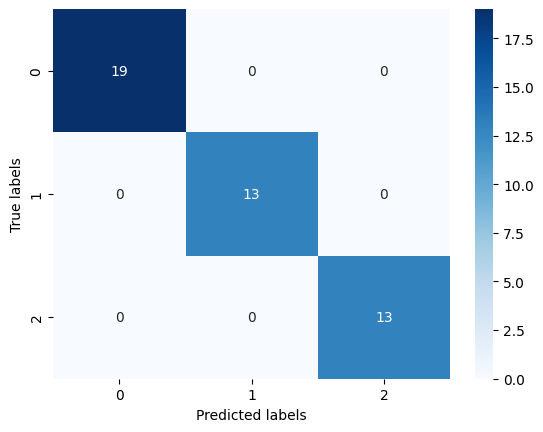

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_copy = np.argmax(y_pred, axis=1)

cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_copy)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

From the confusion matrix, we see that the model best predicts items which fall under the first class which has a label of 1.

### Plot the residual, training and testing error

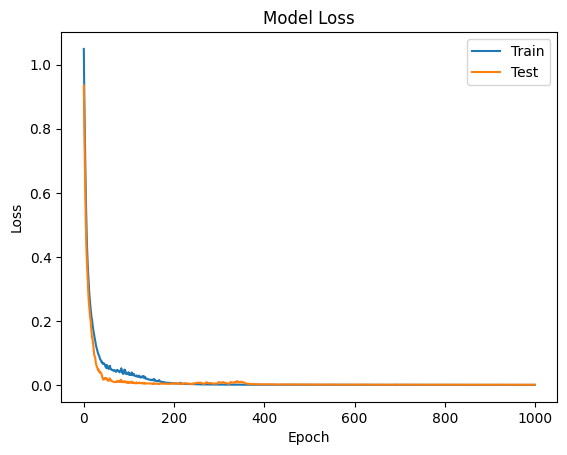

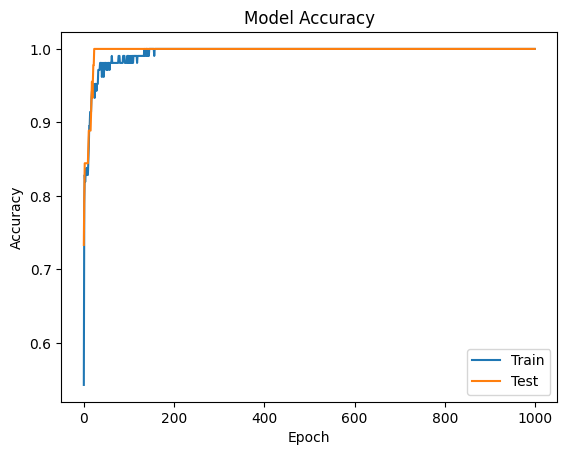

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

In [78]:
# Evaluate the model on the training and testing data
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print("Training Loss: ", train_loss)
print("Training Accuracy: ", train_accuracy)
print("Testing Loss: ", test_loss)
print("Testing Accuracy: ", test_accuracy)


Training Loss:  0.05428199842572212
Training Accuracy:  0.9809523820877075
Testing Loss:  0.011153336614370346
Testing Accuracy:  1.0


Just like the graph and the accuracy metrics above depict, the model over time gets to an extremely high accuracy as it approaches 100 epochs and above. Hence by the end of the 1000th epoch, the model attained 100% accuracy when predicting on the test data.

### 2) Implement a neural network model with 2 hidden layers using the Hyperbolic Tangent (Tanh) activation function

In [85]:
model = Sequential()

model.add(Dense(64, activation='tanh', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='tanh'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=1000, batch_size=32)

Epoch 1/1000
4/4 [==============================] - 1s 79ms/step - loss: 0.8397 - accuracy: 0.6476 - val_loss: 0.6478 - val_accuracy: 0.7111
Epoch 2/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.6819 - accuracy: 0.7048 - val_loss: 0.5409 - val_accuracy: 0.8000
Epoch 3/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.5729 - accuracy: 0.8286 - val_loss: 0.4705 - val_accuracy: 0.8444
Epoch 4/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.4971 - accuracy: 0.8381 - val_loss: 0.4256 - val_accuracy: 0.8444
Epoch 5/1000
4/4 [==============================] - 0s 28ms/step - loss: 0.4449 - accuracy: 0.8476 - val_loss: 0.3970 - val_accuracy: 0.8444
Epoch 6/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.4087 - accuracy: 0.8476 - val_loss: 0.3759 - val_accuracy: 0.8444
Epoch 7/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.3818 - accuracy: 0.8476 - val_loss: 0.3592 - val_accuracy: 0.8444
Epoch 8/1000


Epoch 59/1000
4/4 [==============================] - 1s 202ms/step - loss: 0.1052 - accuracy: 0.9619 - val_loss: 0.0563 - val_accuracy: 1.0000
Epoch 60/1000
4/4 [==============================] - 0s 128ms/step - loss: 0.1006 - accuracy: 0.9619 - val_loss: 0.0565 - val_accuracy: 1.0000
Epoch 61/1000
4/4 [==============================] - 1s 246ms/step - loss: 0.0990 - accuracy: 0.9619 - val_loss: 0.0563 - val_accuracy: 1.0000
Epoch 62/1000
4/4 [==============================] - 1s 232ms/step - loss: 0.0999 - accuracy: 0.9524 - val_loss: 0.0574 - val_accuracy: 0.9778
Epoch 63/1000
4/4 [==============================] - 0s 94ms/step - loss: 0.0968 - accuracy: 0.9524 - val_loss: 0.0543 - val_accuracy: 1.0000
Epoch 64/1000
4/4 [==============================] - 0s 47ms/step - loss: 0.0963 - accuracy: 0.9619 - val_loss: 0.0507 - val_accuracy: 1.0000
Epoch 65/1000
4/4 [==============================] - 0s 58ms/step - loss: 0.0943 - accuracy: 0.9619 - val_loss: 0.0490 - val_accuracy: 1.0000
Ep

4/4 [==============================] - 0s 12ms/step - loss: 0.0692 - accuracy: 0.9810 - val_loss: 0.0266 - val_accuracy: 1.0000
Epoch 117/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0671 - accuracy: 0.9810 - val_loss: 0.0269 - val_accuracy: 1.0000
Epoch 118/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0658 - accuracy: 0.9810 - val_loss: 0.0280 - val_accuracy: 1.0000
Epoch 119/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0662 - accuracy: 0.9524 - val_loss: 0.0289 - val_accuracy: 1.0000
Epoch 120/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0674 - accuracy: 0.9524 - val_loss: 0.0294 - val_accuracy: 0.9778
Epoch 121/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0678 - accuracy: 0.9524 - val_loss: 0.0284 - val_accuracy: 1.0000
Epoch 122/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0668 - accuracy: 0.9524 - val_loss: 0.0255 - val_accuracy: 1.0000
Epoch 123/1000

4/4 [==============================] - 0s 25ms/step - loss: 0.0597 - accuracy: 0.9810 - val_loss: 0.0205 - val_accuracy: 1.0000
Epoch 174/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.0597 - accuracy: 0.9810 - val_loss: 0.0208 - val_accuracy: 1.0000
Epoch 175/1000
4/4 [==============================] - 0s 33ms/step - loss: 0.0586 - accuracy: 0.9810 - val_loss: 0.0215 - val_accuracy: 1.0000
Epoch 176/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.0589 - accuracy: 0.9810 - val_loss: 0.0222 - val_accuracy: 1.0000
Epoch 177/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.0601 - accuracy: 0.9810 - val_loss: 0.0222 - val_accuracy: 1.0000
Epoch 178/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.0593 - accuracy: 0.9810 - val_loss: 0.0222 - val_accuracy: 1.0000
Epoch 179/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.0636 - accuracy: 0.9714 - val_loss: 0.0251 - val_accuracy: 0.9778
Epoch 180/1000

4/4 [==============================] - 0s 13ms/step - loss: 0.0585 - accuracy: 0.9810 - val_loss: 0.0175 - val_accuracy: 1.0000
Epoch 231/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0592 - accuracy: 0.9810 - val_loss: 0.0174 - val_accuracy: 1.0000
Epoch 232/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0573 - accuracy: 0.9810 - val_loss: 0.0159 - val_accuracy: 1.0000
Epoch 233/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0559 - accuracy: 0.9810 - val_loss: 0.0169 - val_accuracy: 1.0000
Epoch 234/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0575 - accuracy: 0.9714 - val_loss: 0.0188 - val_accuracy: 1.0000
Epoch 235/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0593 - accuracy: 0.9714 - val_loss: 0.0185 - val_accuracy: 1.0000
Epoch 236/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0577 - accuracy: 0.9714 - val_loss: 0.0180 - val_accuracy: 1.0000
Epoch 237/1000

4/4 [==============================] - 0s 14ms/step - loss: 0.0563 - accuracy: 0.9810 - val_loss: 0.0143 - val_accuracy: 1.0000
Epoch 288/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0547 - accuracy: 0.9810 - val_loss: 0.0148 - val_accuracy: 1.0000
Epoch 289/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0549 - accuracy: 0.9810 - val_loss: 0.0154 - val_accuracy: 1.0000
Epoch 290/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0548 - accuracy: 0.9810 - val_loss: 0.0150 - val_accuracy: 1.0000
Epoch 291/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0544 - accuracy: 0.9810 - val_loss: 0.0147 - val_accuracy: 1.0000
Epoch 292/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0546 - accuracy: 0.9810 - val_loss: 0.0150 - val_accuracy: 1.0000
Epoch 293/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0545 - accuracy: 0.9810 - val_loss: 0.0150 - val_accuracy: 1.0000
Epoch 294/1000

4/4 [==============================] - 0s 13ms/step - loss: 0.0542 - accuracy: 0.9810 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 345/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0551 - accuracy: 0.9810 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 346/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0544 - accuracy: 0.9810 - val_loss: 0.0116 - val_accuracy: 1.0000
Epoch 347/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0546 - accuracy: 0.9810 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 348/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0553 - accuracy: 0.9810 - val_loss: 0.0117 - val_accuracy: 1.0000
Epoch 349/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0533 - accuracy: 0.9810 - val_loss: 0.0106 - val_accuracy: 1.0000
Epoch 350/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0540 - accuracy: 0.9810 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 351/1000

4/4 [==============================] - 0s 12ms/step - loss: 0.0531 - accuracy: 0.9810 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 402/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0540 - accuracy: 0.9810 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 403/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0529 - accuracy: 0.9810 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 404/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0531 - accuracy: 0.9810 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 405/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0535 - accuracy: 0.9810 - val_loss: 0.0104 - val_accuracy: 1.0000
Epoch 406/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0548 - accuracy: 0.9810 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 407/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0529 - accuracy: 0.9810 - val_loss: 0.0116 - val_accuracy: 1.0000
Epoch 408/1000

4/4 [==============================] - 0s 13ms/step - loss: 0.0536 - accuracy: 0.9810 - val_loss: 0.0130 - val_accuracy: 1.0000
Epoch 459/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0549 - accuracy: 0.9810 - val_loss: 0.0128 - val_accuracy: 1.0000
Epoch 460/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0558 - accuracy: 0.9810 - val_loss: 0.0123 - val_accuracy: 1.0000
Epoch 461/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0548 - accuracy: 0.9810 - val_loss: 0.0136 - val_accuracy: 1.0000
Epoch 462/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0559 - accuracy: 0.9714 - val_loss: 0.0128 - val_accuracy: 1.0000
Epoch 463/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0516 - accuracy: 0.9810 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 464/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0579 - accuracy: 0.9810 - val_loss: 0.0110 - val_accuracy: 1.0000
Epoch 465/1000

4/4 [==============================] - 0s 13ms/step - loss: 0.0545 - accuracy: 0.9810 - val_loss: 0.0127 - val_accuracy: 1.0000
Epoch 516/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0513 - accuracy: 0.9810 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 517/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.0536 - accuracy: 0.9810 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 518/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0549 - accuracy: 0.9810 - val_loss: 0.0105 - val_accuracy: 1.0000
Epoch 519/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0545 - accuracy: 0.9810 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 520/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0496 - accuracy: 0.9810 - val_loss: 0.0129 - val_accuracy: 1.0000
Epoch 521/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0554 - accuracy: 0.9714 - val_loss: 0.0154 - val_accuracy: 1.0000
Epoch 522/1000

4/4 [==============================] - 0s 13ms/step - loss: 0.0526 - accuracy: 0.9810 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 573/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0540 - accuracy: 0.9810 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 574/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0546 - accuracy: 0.9810 - val_loss: 0.0104 - val_accuracy: 1.0000
Epoch 575/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0520 - accuracy: 0.9810 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 576/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0521 - accuracy: 0.9810 - val_loss: 0.0120 - val_accuracy: 1.0000
Epoch 577/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0538 - accuracy: 0.9810 - val_loss: 0.0126 - val_accuracy: 1.0000
Epoch 578/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0544 - accuracy: 0.9810 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 579/1000

4/4 [==============================] - 0s 16ms/step - loss: 0.0518 - accuracy: 0.9810 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 630/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0518 - accuracy: 0.9810 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 631/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0520 - accuracy: 0.9810 - val_loss: 0.0092 - val_accuracy: 1.0000
Epoch 632/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0511 - accuracy: 0.9810 - val_loss: 0.0100 - val_accuracy: 1.0000
Epoch 633/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0518 - accuracy: 0.9810 - val_loss: 0.0116 - val_accuracy: 1.0000
Epoch 634/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0547 - accuracy: 0.9810 - val_loss: 0.0126 - val_accuracy: 1.0000
Epoch 635/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0534 - accuracy: 0.9810 - val_loss: 0.0119 - val_accuracy: 1.0000
Epoch 636/1000

4/4 [==============================] - 0s 14ms/step - loss: 0.0525 - accuracy: 0.9810 - val_loss: 0.0089 - val_accuracy: 1.0000
Epoch 687/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0540 - accuracy: 0.9810 - val_loss: 0.0088 - val_accuracy: 1.0000
Epoch 688/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0530 - accuracy: 0.9810 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 689/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0534 - accuracy: 0.9810 - val_loss: 0.0088 - val_accuracy: 1.0000
Epoch 690/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0530 - accuracy: 0.9810 - val_loss: 0.0088 - val_accuracy: 1.0000
Epoch 691/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0515 - accuracy: 0.9810 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 692/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0512 - accuracy: 0.9810 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 693/1000

4/4 [==============================] - 0s 13ms/step - loss: 0.0512 - accuracy: 0.9810 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 744/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0508 - accuracy: 0.9810 - val_loss: 0.0106 - val_accuracy: 1.0000
Epoch 745/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0509 - accuracy: 0.9810 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 746/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0509 - accuracy: 0.9810 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 747/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0511 - accuracy: 0.9810 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 748/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0509 - accuracy: 0.9810 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 749/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0520 - accuracy: 0.9810 - val_loss: 0.0127 - val_accuracy: 1.0000
Epoch 750/1000

4/4 [==============================] - 0s 13ms/step - loss: 0.0510 - accuracy: 0.9810 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 801/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0519 - accuracy: 0.9810 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 802/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0512 - accuracy: 0.9810 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 803/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0510 - accuracy: 0.9810 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 804/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0511 - accuracy: 0.9810 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 805/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0488 - accuracy: 0.9810 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 806/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0501 - accuracy: 0.9810 - val_loss: 0.0121 - val_accuracy: 1.0000
Epoch 807/1000

4/4 [==============================] - 0s 13ms/step - loss: 0.0499 - accuracy: 0.9810 - val_loss: 0.0133 - val_accuracy: 1.0000
Epoch 858/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0497 - accuracy: 0.9810 - val_loss: 0.0127 - val_accuracy: 1.0000
Epoch 859/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0494 - accuracy: 0.9810 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 860/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0501 - accuracy: 0.9810 - val_loss: 0.0119 - val_accuracy: 1.0000
Epoch 861/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0510 - accuracy: 0.9810 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 862/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0510 - accuracy: 0.9810 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 863/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0500 - accuracy: 0.9810 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 864/1000

4/4 [==============================] - 0s 13ms/step - loss: 0.0515 - accuracy: 0.9810 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 915/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0521 - accuracy: 0.9810 - val_loss: 0.0093 - val_accuracy: 1.0000
Epoch 916/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0490 - accuracy: 0.9810 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 917/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0496 - accuracy: 0.9810 - val_loss: 0.0086 - val_accuracy: 1.0000
Epoch 918/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0486 - accuracy: 0.9810 - val_loss: 0.0083 - val_accuracy: 1.0000
Epoch 919/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0490 - accuracy: 0.9810 - val_loss: 0.0084 - val_accuracy: 1.0000
Epoch 920/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0490 - accuracy: 0.9810 - val_loss: 0.0088 - val_accuracy: 1.0000
Epoch 921/1000

4/4 [==============================] - 0s 13ms/step - loss: 0.0491 - accuracy: 0.9810 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 972/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0485 - accuracy: 0.9810 - val_loss: 0.0097 - val_accuracy: 1.0000
Epoch 973/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0488 - accuracy: 0.9810 - val_loss: 0.0100 - val_accuracy: 1.0000
Epoch 974/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0489 - accuracy: 0.9810 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 975/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0477 - accuracy: 0.9810 - val_loss: 0.0106 - val_accuracy: 1.0000
Epoch 976/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0472 - accuracy: 0.9810 - val_loss: 0.0117 - val_accuracy: 1.0000
Epoch 977/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0476 - accuracy: 0.9810 - val_loss: 0.0116 - val_accuracy: 1.0000
Epoch 978/1000

Here, we define a sequential neural network model using Keras. We add 2 dense layers with 64 and 32 neurons each, respectively, and use the Hyperbolic Tangent (Tanh) activation function. We also add a final dense layer with 3 neurons for output using the softmax activation function(this activation function is used for multiclass problems). The model is also compiled using the Adam optimizer and categorical cross-entropy loss function.

We then fit the model on the training data for 100 epochs with a batch size of 32. We also evaluate the model on the testing data using the validation_data parameter and accuracy as a metric.

Tanh tends to make each layer’s output more or less centered around 0, which helps speed up convergence but has the problem of Vanishing gradient and is computationally expensive.

Follow this link for more information on Hyperbolic Tan(Tanh): <a href="https://towardsdatascience.com/7-popular-activation-functions-you-should-know-in-deep-learning-and-how-to-use-them-with-keras-and-27b4d838dfe6">(7 popular activation functions you should know in Deep Learning and how to use them with Keras and TensorFlow 2)</a>

### Compute and plot the confusion matrix

2/2 [==============================] - 0s 4ms/step


Text(50.722222222222214, 0.5, 'True labels')

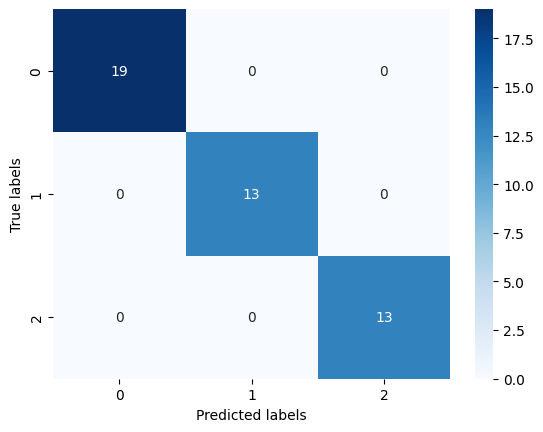

In [81]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_copy = np.argmax(y_pred, axis=1)

cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_copy)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

From the confusion matrix, we see that the model best predicts items which fall under the first class which has a label of 1.

### Plot the residual, training and testing error

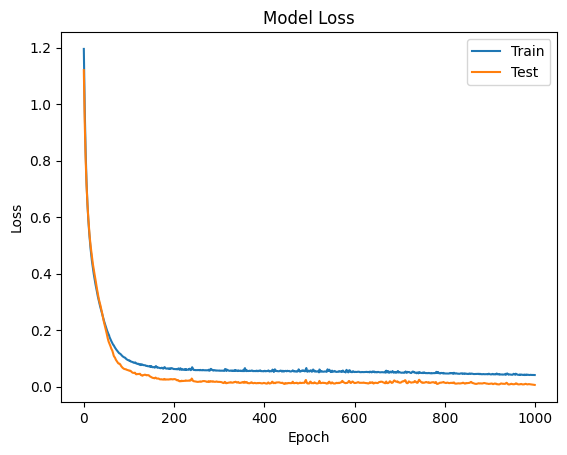

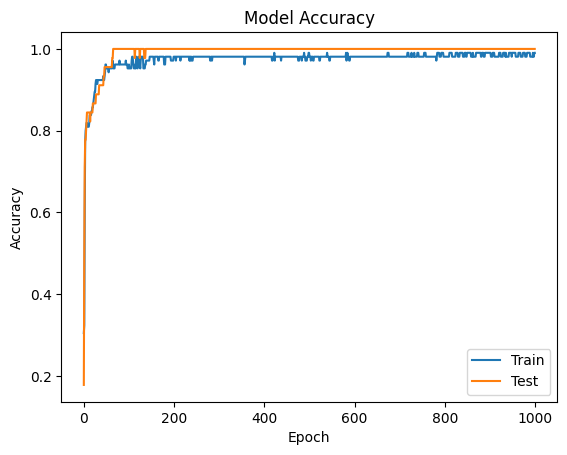

In [83]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

In [84]:
# Evaluate the model on the training and testing data
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print("Training Loss: ", train_loss)
print("Training Accuracy: ", train_accuracy)
print("Testing Loss: ", test_loss)
print("Testing Accuracy: ", test_accuracy)

Training Loss:  0.04138986021280289
Training Accuracy:  0.9904761910438538
Testing Loss:  0.006403196603059769
Testing Accuracy:  1.0


Just like the graph and the accuracy metrics above depict, the model over time gets to an extremely high accuracy as it approaches 100 epochs and above. Hence by the end of the 1000th epoch, the model attained 100% accuracy when predicting on the test data.
Notably, the accuracy metrics are not very different from the results gotten from using the previous model.

We can deduce from this that the Tanh activation function performs better than ReLU for multi-class classification problems. This is because while we used 3 hidden layers with ReLU, we only used 2 hidden layers when building the model with the Tanh activation function. We can also presume that if we had added another layer to the current model(built with Tanh), the model's performance could have yieled even better results.

### 3) Implement a neural network model with 3 hidden layers using the Sigmoid activation function

In [86]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=1000, batch_size=32)

Epoch 1/1000
4/4 [==============================] - 8s 224ms/step - loss: 1.1168 - accuracy: 0.2952 - val_loss: 1.0939 - val_accuracy: 0.2889
Epoch 2/1000
4/4 [==============================] - 0s 36ms/step - loss: 1.0970 - accuracy: 0.3524 - val_loss: 1.1150 - val_accuracy: 0.3111
Epoch 3/1000
4/4 [==============================] - 0s 31ms/step - loss: 1.0932 - accuracy: 0.3429 - val_loss: 1.1216 - val_accuracy: 0.2889
Epoch 4/1000
4/4 [==============================] - 0s 27ms/step - loss: 1.0891 - accuracy: 0.3524 - val_loss: 1.1159 - val_accuracy: 0.2889
Epoch 5/1000
4/4 [==============================] - 0s 25ms/step - loss: 1.0896 - accuracy: 0.3524 - val_loss: 1.1107 - val_accuracy: 0.2889
Epoch 6/1000
4/4 [==============================] - 0s 24ms/step - loss: 1.0871 - accuracy: 0.3524 - val_loss: 1.1060 - val_accuracy: 0.2889
Epoch 7/1000
4/4 [==============================] - 0s 29ms/step - loss: 1.0823 - accuracy: 0.3524 - val_loss: 1.0967 - val_accuracy: 0.2889
Epoch 8/1000

4/4 [==============================] - 0s 25ms/step - loss: 0.3611 - accuracy: 0.9238 - val_loss: 0.3110 - val_accuracy: 0.9333
Epoch 59/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.3544 - accuracy: 0.9333 - val_loss: 0.3052 - val_accuracy: 0.9333
Epoch 60/1000
4/4 [==============================] - 0s 29ms/step - loss: 0.3469 - accuracy: 0.9238 - val_loss: 0.3024 - val_accuracy: 0.9333
Epoch 61/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.3412 - accuracy: 0.9238 - val_loss: 0.2943 - val_accuracy: 0.9333
Epoch 62/1000
4/4 [==============================] - 0s 27ms/step - loss: 0.3343 - accuracy: 0.9238 - val_loss: 0.2874 - val_accuracy: 0.9333
Epoch 63/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.3267 - accuracy: 0.9238 - val_loss: 0.2844 - val_accuracy: 0.9333
Epoch 64/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.3243 - accuracy: 0.9238 - val_loss: 0.2828 - val_accuracy: 0.9333
Epoch 65/1000
4/4 [=

Epoch 116/1000
4/4 [==============================] - 0s 45ms/step - loss: 0.1359 - accuracy: 0.9714 - val_loss: 0.1028 - val_accuracy: 0.9778
Epoch 117/1000
4/4 [==============================] - 0s 39ms/step - loss: 0.1340 - accuracy: 0.9619 - val_loss: 0.0976 - val_accuracy: 0.9778
Epoch 118/1000
4/4 [==============================] - 0s 44ms/step - loss: 0.1308 - accuracy: 0.9524 - val_loss: 0.0938 - val_accuracy: 0.9778
Epoch 119/1000
4/4 [==============================] - 0s 30ms/step - loss: 0.1292 - accuracy: 0.9524 - val_loss: 0.0923 - val_accuracy: 0.9778
Epoch 120/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.1276 - accuracy: 0.9524 - val_loss: 0.0902 - val_accuracy: 0.9778
Epoch 121/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.1268 - accuracy: 0.9524 - val_loss: 0.0890 - val_accuracy: 0.9778
Epoch 122/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.1253 - accuracy: 0.9524 - val_loss: 0.0883 - val_accuracy: 0.9778

4/4 [==============================] - 0s 37ms/step - loss: 0.0848 - accuracy: 0.9810 - val_loss: 0.0478 - val_accuracy: 1.0000
Epoch 174/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.0833 - accuracy: 0.9619 - val_loss: 0.0482 - val_accuracy: 0.9778
Epoch 175/1000
4/4 [==============================] - 0s 31ms/step - loss: 0.0832 - accuracy: 0.9619 - val_loss: 0.0488 - val_accuracy: 0.9778
Epoch 176/1000
4/4 [==============================] - 0s 32ms/step - loss: 0.0833 - accuracy: 0.9619 - val_loss: 0.0492 - val_accuracy: 0.9778
Epoch 177/1000
4/4 [==============================] - 0s 28ms/step - loss: 0.0833 - accuracy: 0.9619 - val_loss: 0.0487 - val_accuracy: 0.9778
Epoch 178/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.0835 - accuracy: 0.9619 - val_loss: 0.0471 - val_accuracy: 0.9778
Epoch 179/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.0815 - accuracy: 0.9619 - val_loss: 0.0465 - val_accuracy: 0.9778
Epoch 180/1000

4/4 [==============================] - 0s 25ms/step - loss: 0.0705 - accuracy: 0.9619 - val_loss: 0.0341 - val_accuracy: 1.0000
Epoch 231/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.0692 - accuracy: 0.9810 - val_loss: 0.0331 - val_accuracy: 1.0000
Epoch 232/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.0722 - accuracy: 0.9810 - val_loss: 0.0335 - val_accuracy: 1.0000
Epoch 233/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.0730 - accuracy: 0.9810 - val_loss: 0.0326 - val_accuracy: 1.0000
Epoch 234/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.0694 - accuracy: 0.9810 - val_loss: 0.0322 - val_accuracy: 1.0000
Epoch 235/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.0695 - accuracy: 0.9810 - val_loss: 0.0329 - val_accuracy: 1.0000
Epoch 236/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.0704 - accuracy: 0.9714 - val_loss: 0.0340 - val_accuracy: 0.9778
Epoch 237/1000

4/4 [==============================] - 0s 25ms/step - loss: 0.0640 - accuracy: 0.9810 - val_loss: 0.0244 - val_accuracy: 1.0000
Epoch 288/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.0666 - accuracy: 0.9619 - val_loss: 0.0242 - val_accuracy: 1.0000
Epoch 289/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.0612 - accuracy: 0.9810 - val_loss: 0.0235 - val_accuracy: 1.0000
Epoch 290/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.0649 - accuracy: 0.9810 - val_loss: 0.0251 - val_accuracy: 1.0000
Epoch 291/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.0673 - accuracy: 0.9810 - val_loss: 0.0235 - val_accuracy: 1.0000
Epoch 292/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.0660 - accuracy: 0.9810 - val_loss: 0.0240 - val_accuracy: 1.0000
Epoch 293/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.0646 - accuracy: 0.9619 - val_loss: 0.0260 - val_accuracy: 1.0000
Epoch 294/1000

4/4 [==============================] - 0s 22ms/step - loss: 0.0681 - accuracy: 0.9714 - val_loss: 0.0205 - val_accuracy: 1.0000
Epoch 345/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.0642 - accuracy: 0.9810 - val_loss: 0.0189 - val_accuracy: 1.0000
Epoch 346/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.0631 - accuracy: 0.9810 - val_loss: 0.0204 - val_accuracy: 1.0000
Epoch 347/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.0612 - accuracy: 0.9619 - val_loss: 0.0188 - val_accuracy: 1.0000
Epoch 348/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.0599 - accuracy: 0.9810 - val_loss: 0.0207 - val_accuracy: 1.0000
Epoch 349/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.0638 - accuracy: 0.9714 - val_loss: 0.0249 - val_accuracy: 1.0000
Epoch 350/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.0738 - accuracy: 0.9714 - val_loss: 0.0243 - val_accuracy: 1.0000
Epoch 351/1000

4/4 [==============================] - 0s 22ms/step - loss: 0.0586 - accuracy: 0.9810 - val_loss: 0.0179 - val_accuracy: 1.0000
Epoch 402/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.0581 - accuracy: 0.9810 - val_loss: 0.0178 - val_accuracy: 1.0000
Epoch 403/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.0576 - accuracy: 0.9714 - val_loss: 0.0202 - val_accuracy: 1.0000
Epoch 404/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.0627 - accuracy: 0.9619 - val_loss: 0.0207 - val_accuracy: 1.0000
Epoch 405/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.0637 - accuracy: 0.9619 - val_loss: 0.0194 - val_accuracy: 1.0000
Epoch 406/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.0617 - accuracy: 0.9810 - val_loss: 0.0179 - val_accuracy: 1.0000
Epoch 407/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.0595 - accuracy: 0.9810 - val_loss: 0.0175 - val_accuracy: 1.0000
Epoch 408/1000

4/4 [==============================] - 0s 25ms/step - loss: 0.0617 - accuracy: 0.9810 - val_loss: 0.0173 - val_accuracy: 1.0000
Epoch 459/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.0633 - accuracy: 0.9619 - val_loss: 0.0175 - val_accuracy: 1.0000
Epoch 460/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.0610 - accuracy: 0.9714 - val_loss: 0.0162 - val_accuracy: 1.0000
Epoch 461/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.0603 - accuracy: 0.9810 - val_loss: 0.0158 - val_accuracy: 1.0000
Epoch 462/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.0572 - accuracy: 0.9810 - val_loss: 0.0160 - val_accuracy: 1.0000
Epoch 463/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.0567 - accuracy: 0.9810 - val_loss: 0.0176 - val_accuracy: 1.0000
Epoch 464/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.0593 - accuracy: 0.9810 - val_loss: 0.0177 - val_accuracy: 1.0000
Epoch 465/1000

4/4 [==============================] - 0s 22ms/step - loss: 0.0572 - accuracy: 0.9810 - val_loss: 0.0158 - val_accuracy: 1.0000
Epoch 516/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.0573 - accuracy: 0.9810 - val_loss: 0.0153 - val_accuracy: 1.0000
Epoch 517/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.0566 - accuracy: 0.9810 - val_loss: 0.0146 - val_accuracy: 1.0000
Epoch 518/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.0572 - accuracy: 0.9810 - val_loss: 0.0147 - val_accuracy: 1.0000
Epoch 519/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.0577 - accuracy: 0.9810 - val_loss: 0.0147 - val_accuracy: 1.0000
Epoch 520/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.0575 - accuracy: 0.9810 - val_loss: 0.0144 - val_accuracy: 1.0000
Epoch 521/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.0577 - accuracy: 0.9810 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 522/1000

4/4 [==============================] - 0s 23ms/step - loss: 0.0574 - accuracy: 0.9810 - val_loss: 0.0127 - val_accuracy: 1.0000
Epoch 573/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.0557 - accuracy: 0.9810 - val_loss: 0.0128 - val_accuracy: 1.0000
Epoch 574/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.0555 - accuracy: 0.9810 - val_loss: 0.0129 - val_accuracy: 1.0000
Epoch 575/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.0552 - accuracy: 0.9810 - val_loss: 0.0134 - val_accuracy: 1.0000
Epoch 576/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.0565 - accuracy: 0.9810 - val_loss: 0.0139 - val_accuracy: 1.0000
Epoch 577/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.0555 - accuracy: 0.9810 - val_loss: 0.0131 - val_accuracy: 1.0000
Epoch 578/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.0559 - accuracy: 0.9810 - val_loss: 0.0129 - val_accuracy: 1.0000
Epoch 579/1000

4/4 [==============================] - 0s 23ms/step - loss: 0.0552 - accuracy: 0.9810 - val_loss: 0.0123 - val_accuracy: 1.0000
Epoch 630/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.0551 - accuracy: 0.9810 - val_loss: 0.0123 - val_accuracy: 1.0000
Epoch 631/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.0551 - accuracy: 0.9810 - val_loss: 0.0123 - val_accuracy: 1.0000
Epoch 632/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.0555 - accuracy: 0.9810 - val_loss: 0.0123 - val_accuracy: 1.0000
Epoch 633/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.0559 - accuracy: 0.9810 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 634/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.0558 - accuracy: 0.9810 - val_loss: 0.0135 - val_accuracy: 1.0000
Epoch 635/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.0562 - accuracy: 0.9810 - val_loss: 0.0137 - val_accuracy: 1.0000
Epoch 636/1000

4/4 [==============================] - 0s 23ms/step - loss: 0.0553 - accuracy: 0.9810 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 687/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.0569 - accuracy: 0.9810 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 688/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.0544 - accuracy: 0.9810 - val_loss: 0.0120 - val_accuracy: 1.0000
Epoch 689/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.0565 - accuracy: 0.9810 - val_loss: 0.0127 - val_accuracy: 1.0000
Epoch 690/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.0570 - accuracy: 0.9810 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 691/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.0549 - accuracy: 0.9810 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 692/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.0565 - accuracy: 0.9810 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 693/1000

4/4 [==============================] - 0s 31ms/step - loss: 0.0560 - accuracy: 0.9810 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 744/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.0553 - accuracy: 0.9810 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 745/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.0541 - accuracy: 0.9810 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 746/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.0538 - accuracy: 0.9810 - val_loss: 0.0144 - val_accuracy: 1.0000
Epoch 747/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.0593 - accuracy: 0.9714 - val_loss: 0.0153 - val_accuracy: 1.0000
Epoch 748/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.0597 - accuracy: 0.9714 - val_loss: 0.0135 - val_accuracy: 1.0000
Epoch 749/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.0567 - accuracy: 0.9810 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 750/1000

4/4 [==============================] - 0s 20ms/step - loss: 0.0542 - accuracy: 0.9810 - val_loss: 0.0106 - val_accuracy: 1.0000
Epoch 801/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.0541 - accuracy: 0.9810 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 802/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.0565 - accuracy: 0.9810 - val_loss: 0.0117 - val_accuracy: 1.0000
Epoch 803/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.0555 - accuracy: 0.9810 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 804/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.0543 - accuracy: 0.9810 - val_loss: 0.0106 - val_accuracy: 1.0000
Epoch 805/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.0570 - accuracy: 0.9810 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 806/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.0549 - accuracy: 0.9810 - val_loss: 0.0104 - val_accuracy: 1.0000
Epoch 807/1000

4/4 [==============================] - 0s 23ms/step - loss: 0.0571 - accuracy: 0.9810 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 858/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.0559 - accuracy: 0.9810 - val_loss: 0.0119 - val_accuracy: 1.0000
Epoch 859/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.0553 - accuracy: 0.9810 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 860/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.0539 - accuracy: 0.9810 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 861/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.0538 - accuracy: 0.9810 - val_loss: 0.0097 - val_accuracy: 1.0000
Epoch 862/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.0543 - accuracy: 0.9810 - val_loss: 0.0096 - val_accuracy: 1.0000
Epoch 863/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.0552 - accuracy: 0.9810 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 864/1000

4/4 [==============================] - 0s 25ms/step - loss: 0.0557 - accuracy: 0.9810 - val_loss: 0.0096 - val_accuracy: 1.0000
Epoch 915/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.0545 - accuracy: 0.9810 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 916/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.0537 - accuracy: 0.9810 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 917/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.0555 - accuracy: 0.9810 - val_loss: 0.0139 - val_accuracy: 1.0000
Epoch 918/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.0585 - accuracy: 0.9714 - val_loss: 0.0144 - val_accuracy: 1.0000
Epoch 919/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.0571 - accuracy: 0.9714 - val_loss: 0.0120 - val_accuracy: 1.0000
Epoch 920/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.0532 - accuracy: 0.9810 - val_loss: 0.0100 - val_accuracy: 1.0000
Epoch 921/1000

4/4 [==============================] - 0s 24ms/step - loss: 0.0538 - accuracy: 0.9810 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 972/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.0548 - accuracy: 0.9810 - val_loss: 0.0100 - val_accuracy: 1.0000
Epoch 973/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.0539 - accuracy: 0.9810 - val_loss: 0.0106 - val_accuracy: 1.0000
Epoch 974/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.0543 - accuracy: 0.9810 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 975/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.0557 - accuracy: 0.9810 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 976/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.0561 - accuracy: 0.9810 - val_loss: 0.0100 - val_accuracy: 1.0000
Epoch 977/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.0560 - accuracy: 0.9810 - val_loss: 0.0100 - val_accuracy: 1.0000
Epoch 978/1000

Here, we define a sequential neural network model using Keras. We add 3 dense layers with 64, 64, and 32 neurons each, respectively, and use the sigmoid activation function. We also add a final dense layer with 3 neurons for output using the softmax activation function(an activation function is used for multiclass problems). The model is also compiled using the Adam optimizer and categorical cross-entropy loss function.

We then fit the model on the training data for 100 epochs with a batch size of 32. We also evaluate the model on the testing data using the validation_data parameter and accuracy as a metric.

Follow this link for more information on the sigmoid activation function: <a href="https://towardsdatascience.com/7-popular-activation-functions-you-should-know-in-deep-learning-and-how-to-use-them-with-keras-and-27b4d838dfe6">(7 popular activation functions you should know in Deep Learning and how to use them with Keras and TensorFlow 2)</a>

### Compute and plot the confusion matrix

2/2 [==============================] - 0s 4ms/step


Text(50.722222222222214, 0.5, 'True labels')

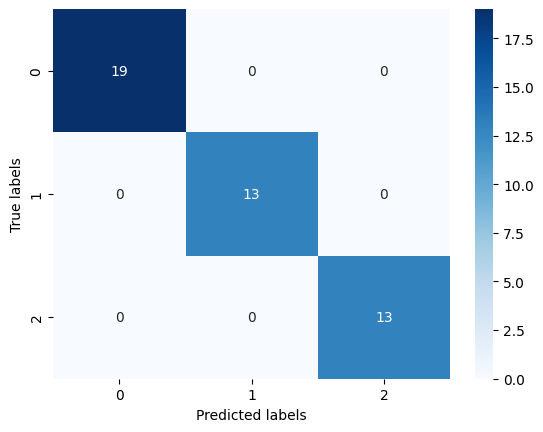

In [87]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

### Plot the residual, training and testing error

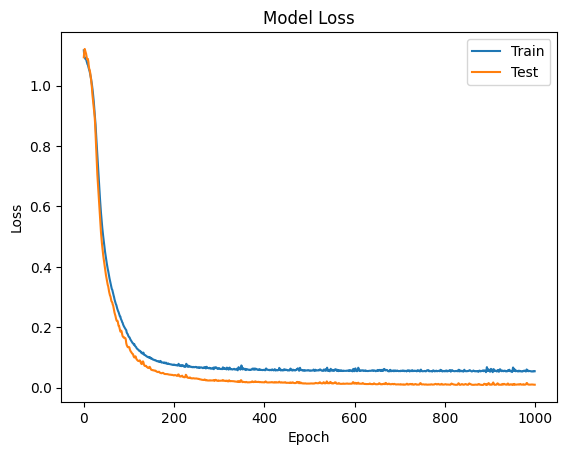

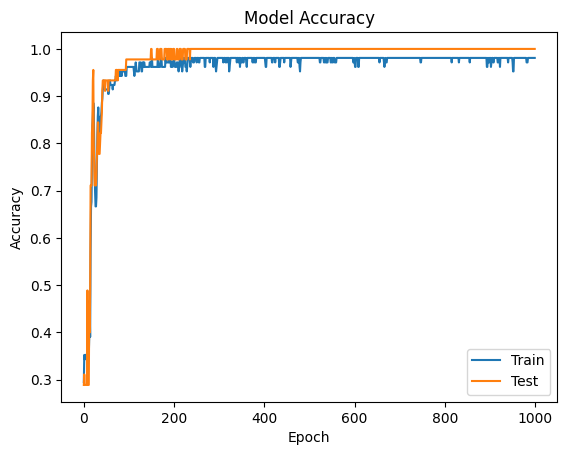

In [88]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

In [89]:
# Evaluate the model on the training and testing data
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print("Training Loss: ", train_loss)
print("Training Accuracy: ", train_accuracy)
print("Testing Loss: ", test_loss)
print("Testing Accuracy: ", test_accuracy)


Training Loss:  0.054511699825525284
Training Accuracy:  0.9809523820877075
Testing Loss:  0.00988238025456667
Testing Accuracy:  1.0


As seen in the loss and accuracy metrics above, we can see that the model over time gets to an extremely high accuracy as it approaches 100 epochs and above. Hence by the end of the 1000th epoch, the model attained 100% accuracy when predicting on the test data. Notably, the accuracy metrics are not very different from the results gotten from using the previous model.

However, the training and testing loss of the model built using the sigmoid activation function is slightly higher than those of the model built with the Tanh activation function. Also, while we used 3 hidden layers with the sigmoid function, we only used 2 hidden layers when building the model with the Tanh activation function.

We can deduce from this that the Tanh activation function performs better than the sigmoid activation function for multi-class classification problems. 

                                                    THE END!